# Graph Examples - Protein Interaction dataset(minimized)

## Import cuxfilter

In [ ]:
import cuxfilter
import cudf
import cugraph
import numpy as np, pandas as pd

ITERATIONS=500
THETA=1.0
OPTIMIZE=True

## Load required datasets

In [ ]:
edges = cudf.read_csv('./data/edges.csv',)[['Source','Destination', 'edgeColor']]
nodes = cudf.read_csv('./data/nodes.csv',)[['x', 'y', 'SYMBOL', 'Color']]
nodes.Color = nodes.Color - nodes.Color.min()

In [ ]:
nodes.head()

In [ ]:
edges.head()

## preprocess the data

In [ ]:
edges.columns=["source", "destination", 'color']

G = cugraph.Graph()
G.from_cudf_edgelist(edges)

nodes_ = cugraph.layout.force_atlas2(G, max_iter=500,
                strong_gravity_mode=False,
                outbound_attraction_distribution=True,
                lin_log_mode=False,
                barnes_hut_optimize=OPTIMIZE, barnes_hut_theta=THETA, verbose=True)

In [ ]:
nodes_1 = nodes_.merge(nodes, left_on='vertex', right_on='SYMBOL', suffixes=('', '_y'))[list(nodes.columns)]

In [ ]:
nodes_1.head()

## Define charts

In [ ]:
cux_df = cuxfilter.DataFrame.load_graph((nodes_1, edges))

In [ ]:
chart0 = cuxfilter.charts.graph(edge_target='destination',edge_color_palette=['gray', 'black'], 
                                            node_id='SYMBOL', timeout=200, edge_aggregate_col='color',
                                            node_aggregate_col='Color', node_aggregate_fn='mean', node_pixel_shade_type='linear',
                                            edge_render_type='direct',#other option available -> 'curved'
                                            edge_transparency=0.5, unselected_alpha=0.2
                                          )

chart1 = cuxfilter.charts.number('Color', aggregate_fn="mean", widget=True, title="Mean Color")

## Create a dashboard object

In [ ]:
d = cux_df.dashboard([chart0, chart1], layout=cuxfilter.layouts.single_feature)

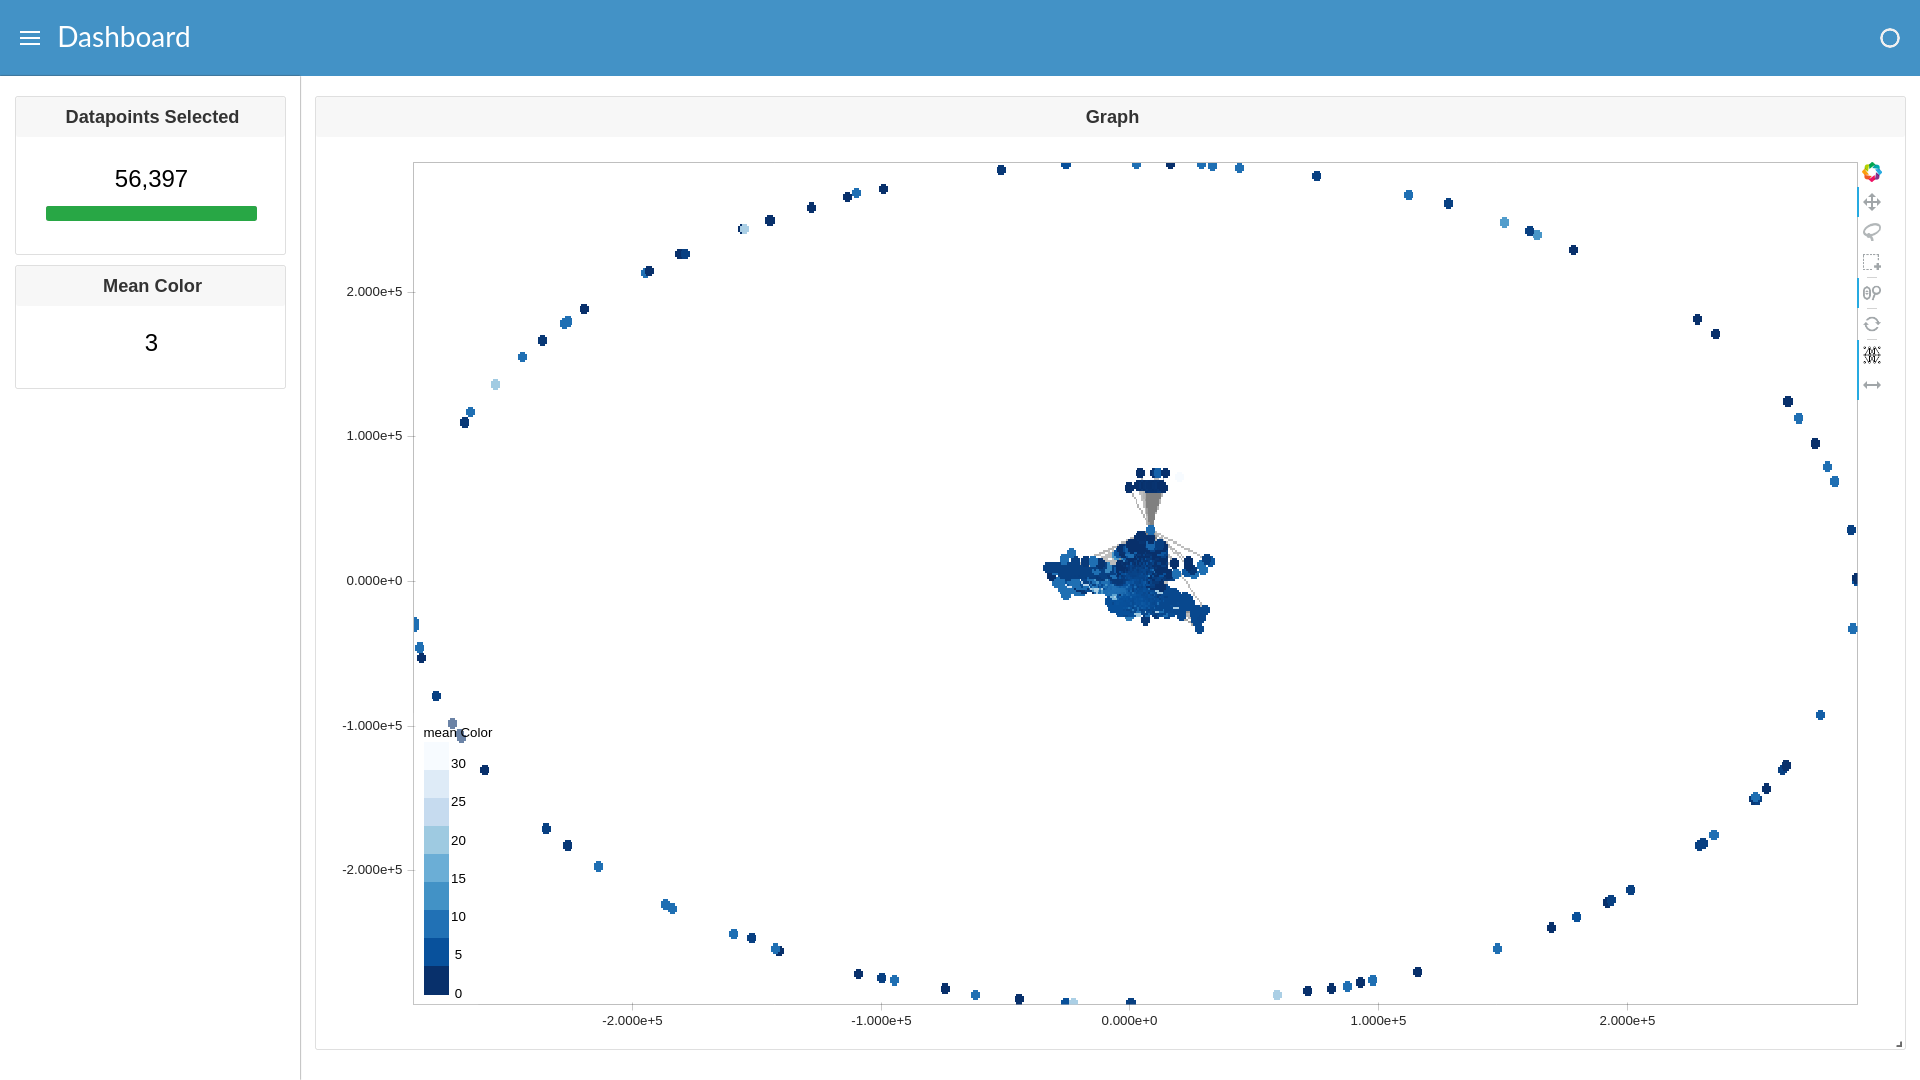

In [24]:
#execute below line for dashboard preview
await d.preview()

## Starting the dashboard

1. d.show('current_notebook_url:current_notebook_port') remote dashboard

2. d.app() inline within the notebook cell

Incase you need to stop the server:

- d.stop()

In [ ]:
# d.show(notebook_url='')

## Export the queried data into a dataframe

In [ ]:
queried_df = d.export()